In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
file_location = r"D:/softwares/python_workspace/data/"
test_df = pd.read_csv(file_location + "test.csv", index_col='PassengerId')
train_df = pd.read_csv(file_location + "train.csv", index_col='PassengerId')

#from info we understand there is no survived dataset in test df, so lets add it so that both df have similar structure
test_df['Survived'] = -888
df = pd.concat([train_df, test_df], axis=0)

D:\Anaconda\lib\site-packages\ipykernel_launcher.py:7: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  import sys


In [5]:
# name and age can be related
def get_title(name):
    title_group = {'mr':'Mr','mrs':'Mrs','miss':'Miss','master':'Master','don':'Sir','dona':'Lady', 'rev':'Sir', 'dr':'Officer'
                  ,'mme':'Mrs', 'ms':'Mrs', 'major':'Officer', 'lady':'Lady', 'sir':'Sir', 'mlle':'Miss', 'col':'Officer',
                   'col':'Officer', 'capt':'Officer', 'the countess':'Lady', 'jonkheer':'Sir'}
    first_name_with_title = name.split(',')[1]
    title = first_name_with_title.split('.')[0]
    title = title.strip().lower()
    return title_group[title]

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1309 entries, 1 to 1309
Data columns (total 12 columns):
Age         1309 non-null float64
Cabin       295 non-null object
Embarked    1307 non-null object
Fare        1308 non-null float64
Name        1309 non-null object
Parch       1309 non-null int64
Pclass      1309 non-null int64
Sex         1309 non-null object
SibSp       1309 non-null int64
Survived    1309 non-null int64
Ticket      1309 non-null object
title       1309 non-null object
dtypes: float64(2), int64(4), object(6)
memory usage: 132.9+ KB


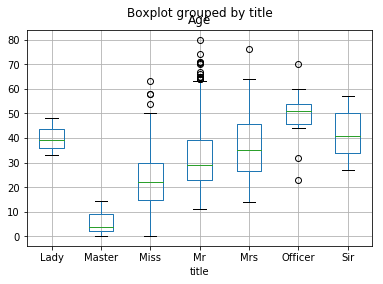

In [6]:
df['title'] = df.Name.apply(get_title)
df[df.title.notnull()].boxplot('Age', 'title')
age_title_median = df.groupby(['title']).Age.transform('median')
df.Age.fillna(age_title_median, inplace=True)
df.info()

(array([ 80.,  62., 324., 426., 189., 108.,  66.,  41.,  10.,   3.]),
 array([ 0.17 ,  8.153, 16.136, 24.119, 32.102, 40.085, 48.068, 56.051,
        64.034, 72.017, 80.   ]),
 <a list of 10 Patch objects>)

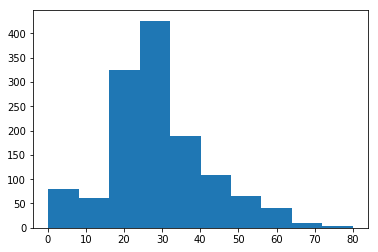

In [7]:
# null changes done above, now we can plot
plt.hist(df.Age)

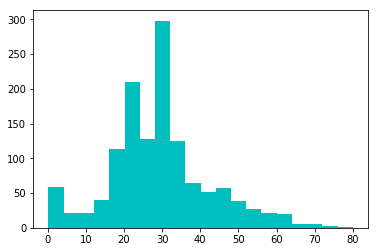

In [8]:
plt.hist(df.Age, bins=20, color='c')
plt.show()

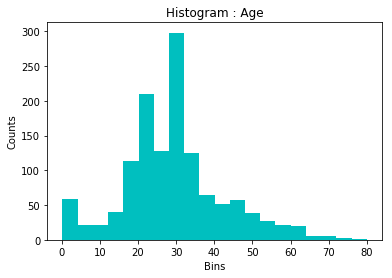

In [9]:
plt.hist(df.Age, bins=20, color='c')
plt.title('Histogram : Age')
plt.xlabel('Bins')
plt.ylabel('Counts')
plt.show()

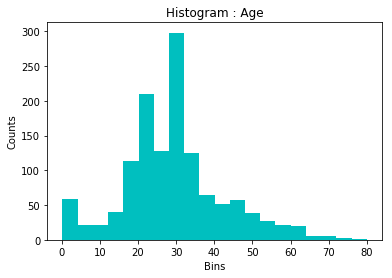

In [10]:
f , ax = plt.subplots()
ax.hist(df.Age, bins=20, color='c')
ax.set_title('Histogram : Age')
ax.set_xlabel('Bins')
ax.set_ylabel('Counts')
plt.show()

D:\Anaconda\lib\site-packages\numpy\lib\histograms.py:720: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
D:\Anaconda\lib\site-packages\numpy\lib\histograms.py:721: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


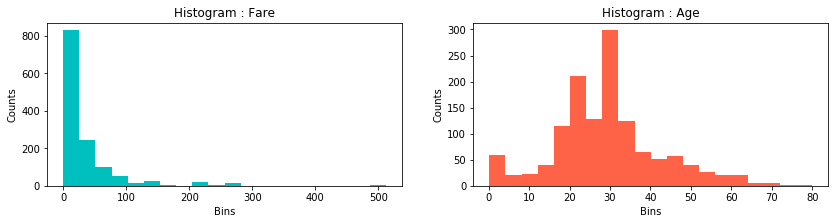

In [11]:
# Add subplots
f , (ax1, ax2) = plt.subplots(1, 2 , figsize=(14,3))

ax1.hist(df.Fare, bins=20, color='c')
ax1.set_title('Histogram : Fare')
ax1.set_xlabel('Bins')
ax1.set_ylabel('Counts')

ax2.hist(df.Age, bins=20, color='tomato')
ax2.set_title('Histogram : Age')
ax2.set_xlabel('Bins')
ax2.set_ylabel('Counts')

plt.show()

D:\Anaconda\lib\site-packages\numpy\lib\histograms.py:720: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
D:\Anaconda\lib\site-packages\numpy\lib\histograms.py:721: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)
D:\Anaconda\lib\site-packages\numpy\lib\function_base.py:3652: RuntimeWarning: Invalid value encountered in percentile
  interpolation=interpolation)
D:\Anaconda\lib\site-packages\matplotlib\cbook\__init__.py:1246: RuntimeWarning: invalid value encountered in less_equal
  wiskhi = np.compress(x <= hival, x)
D:\Anaconda\lib\site-packages\matplotlib\cbook\__init__.py:1253: RuntimeWarning: invalid value encountered in greater_equal
  wisklo = np.compress(x >= loval, x)
D:\Anaconda\lib\site-packages\matplotlib\cbook\__init__.py:1261: RuntimeWarning: invalid value encountered in less
  np.compress(x < stats['whislo'], x),
D:\Anaconda\lib\site-packages\matplotlib\cbook\__init__.py:1262: RuntimeWarning:

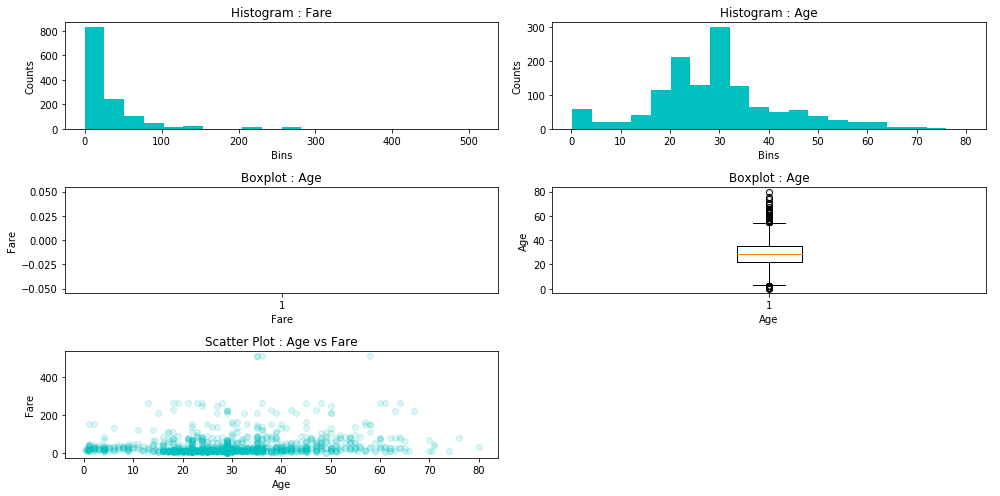

In [12]:
f , ax_arr = plt.subplots(3 , 2 , figsize=(14,7))

# Plot 1
ax_arr[0,0].hist(df.Fare, bins=20, color='c')
ax_arr[0,0].set_title('Histogram : Fare')
ax_arr[0,0].set_xlabel('Bins')
ax_arr[0,0].set_ylabel('Counts')

# Plot 2
ax_arr[0,1].hist(df.Age, bins=20, color='c')
ax_arr[0,1].set_title('Histogram : Age')
ax_arr[0,1].set_xlabel('Bins')
ax_arr[0,1].set_ylabel('Counts')

# Plot 3
ax_arr[1,0].boxplot(df.Fare.values)
ax_arr[1,0].set_title('Boxplot : Age')
ax_arr[1,0].set_xlabel('Fare')
ax_arr[1,0].set_ylabel('Fare')

# Plot 4
ax_arr[1,1].boxplot(df.Age.values)
ax_arr[1,1].set_title('Boxplot : Age')
ax_arr[1,1].set_xlabel('Age')
ax_arr[1,1].set_ylabel('Age')

# Plot 5
ax_arr[2,0].scatter(df.Age, df.Fare, color='c', alpha=0.15)
ax_arr[2,0].set_title('Scatter Plot : Age vs Fare')
ax_arr[2,0].set_xlabel('Age')
ax_arr[2,0].set_ylabel('Fare')

ax_arr[2,1].axis('off')
plt.tight_layout()


plt.show()